In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from os import listdir
import csv
import numpy as np
import plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.signal import find_peaks, peak_prominences
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate, Activation, BatchNormalization,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/LSTM/data")

In [4]:
df2014 = pd.read_csv("events/df2014.csv", delimiter=";",index_col=0)
df2015_01= pd.read_csv("events/df2015_01.csv", delimiter=";",index_col=0)
df2015_02= pd.read_csv("events/df2015_02.csv", delimiter=";",index_col=0)
df2015_03= pd.read_csv("events/df2015_03.csv", delimiter=";",index_col=0)
df2015_08= pd.read_csv("events/df2015_08.csv", delimiter=";",index_col=0)
df2015_09= pd.read_csv("events/df2015_09.csv", delimiter=";",index_col=0)
df2016_01= pd.read_csv("events/df2016_01.csv", delimiter=";",index_col=0)
df2016_02= pd.read_csv("events/df2016_02.csv", delimiter=";",index_col=0)
df2016_03= pd.read_csv("events/df2016_03.csv", delimiter=";",index_col=0)
df2016_04= pd.read_csv("events/df2016_04.csv", delimiter=";",index_col=0)
df2016_05= pd.read_csv("events/df2016_05.csv", delimiter=";",index_col=0)
df2017= pd.read_csv("events/df2017.csv", delimiter=";",index_col=0)
df2018_02= pd.read_csv("events/df2018_02.csv", delimiter=";",index_col=0)
df2018_03_1= pd.read_csv("events/df2018_03_1.csv", delimiter=";",index_col=0)
df2018_03_2= pd.read_csv("events/df2018_03_2.csv", delimiter=";",index_col=0)
df2018_03_3= pd.read_csv("events/df2018_03_3.csv", delimiter=";",index_col=0)
df2019_01= pd.read_csv("events/df2019_01.csv", delimiter=";",index_col=0)
df2019_09= pd.read_csv("events/df2019_09.csv", delimiter=";",index_col=0)
df2019_11= pd.read_csv("events/df2019_11.csv", delimiter=";",index_col=0)
df2019_12_13= pd.read_csv("events/df2019_12.csv", delimiter=";",index_col=0)
df2019_12_22= pd.read_csv("events/df2019_12_1.csv", delimiter=";",index_col=0)

df2020_02= pd.read_csv("events/df2020_02.csv", delimiter=";",index_col=0)
df2020_03 = pd.read_csv("events/df2020_03.csv", delimiter=";",index_col=0)
df2020_04 = pd.read_csv("events/df2020_04.csv", delimiter=";",index_col=0)
df2020_05 = pd.read_csv("events/df2020_05.csv", delimiter=";",index_col=0)
df2020_09 = pd.read_csv("events/df2020_09.csv", delimiter=";",index_col=0)
df2020_10 = pd.read_csv("events/df2020_10.csv", delimiter=";",index_col=0)
df2020_11 = pd.read_csv("events/df2020_11.csv", delimiter=";",index_col=0)
df2021 = pd.read_csv("events/df2021.csv", delimiter=";",index_col=0)

In [5]:
data1981 = pd.read_csv("synthese_obs_FH/synthese_obs_FH_19811212.csv",
                             delimiter=";"
                  )


In [6]:
df1981 = pd.DataFrame()
df1981['Pauillac'] = data1981['PAUILLAC'].astype(float) + 2.539
df1981['Verdon'] = data1981['PORT_BLOC'].astype(float) + 2.871
df1981['Bordeaux'] = data1981['BORDEAUX_PABX'].astype(float) + 1.812

In [7]:
data1988 = pd.read_csv("synthese_obs_FH/synthese_obs_FH_19880317.csv",
                             delimiter=";"
                  )
df1988 = pd.DataFrame()
df1988['Pauillac'] = data1988['PAUILLAC'].astype(float) + 2.539
df1988['Verdon'] = data1988['PORT_BLOC'].astype(float) + 2.871
df1988['Bordeaux'] = data1988['BORDEAUX_PABX'].astype(float) + 1.812

In [8]:
data1995 = pd.read_csv("synthese_obs_FH/synthese_obs_FH_19951220.csv",
                             delimiter=";"
                  )
df1995 = pd.DataFrame()
df1995['Pauillac'] = data1995['PAUILLAC'].astype(float) + 2.539
df1995['Verdon'] = data1995['PORT_BLOC'].astype(float) + 2.871
df1995['Bordeaux'] = data1995['BORDEAUX_PABX'].astype(float) + 1.812

In [9]:
data1996 = pd.read_csv("synthese_obs_FH/synthese_obs_FH_19960203.csv",
                             delimiter=";"
                  )
df1996 = pd.DataFrame()
df1996['Pauillac'] = data1996['PAUILLAC'].astype(float) + 2.539
df1996['Verdon'] = data1996['PORT_BLOC'].astype(float) + 2.871
df1996['Bordeaux'] = data1996['BORDEAUX_PABX'].astype(float) + 1.812

In [10]:
data1998 = pd.read_csv("synthese_obs_FH/PABx_de_19_avril_au_02_mai_1998.csv",
                             delimiter=";"
                  )
df1998 = pd.DataFrame()
df1998['Pauillac'] = data1998['104'].astype(float)*0.01 
df1998['Verdon'] = data1998['101'].astype(float)*0.01 
df1998['Bordeaux'] = data1998['109'].astype(float)*0.01

In [11]:
data1999 = pd.read_csv("synthese_obs_FH/1999.csv",
                             delimiter=";"
                  )
data1999
df1999 = pd.DataFrame()
df1999['Pauillac'] = data1999['Trompeloup'].astype(float) + 2.539
df1999['Verdon'] = data1999['Port_Bloc'].astype(float) + 2.871
df1999['Bordeaux'] = data1999['Bordeaux'].astype(float) + 1.812

In [12]:
data2006 = pd.read_csv("synthese_obs_FH/synthese_obs_FH_20060327.csv",
                             delimiter=";"
                  )
df2006 = pd.DataFrame()
df2006['Pauillac'] = data2006['PAUILLAC'].astype(float) + 2.539
df2006['Verdon'] = data2006['PORT_BLOC'].astype(float) + 2.871
df2006['Bordeaux'] = data2006['BORDEAUX_PABX'].astype(float) + 1.812

In [13]:
df2004 = pd.read_csv("events/df2004.csv", delimiter=";",index_col=0)

In [14]:

from sklearn.preprocessing import MinMaxScaler


def split_sequences(sequences, n_steps, n_steps_out):
    x, y = list(), list()
    for i in range(len(sequences)-n_steps-1):   
        end_ix = i + n_steps
        out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, 0]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)
 


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations

n_features = 3 # les variables d'entrées
seq_len = 9 # input samples 1h:30
steps_out = 6 # output 1h

#definir le modele LSTM ## La couche d'entrée LSTM doit être en 3D 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_len, n_features))) 
model.add(LSTM(50))
model.add(Dense(steps_out))


In [16]:
from keras import backend as K
#définir la foction de perte
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
#compiler le modele 
model.compile(Adam(learning_rate=1e-4), loss = root_mean_squared_error)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 50)             10800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 6)                 306       
Total params: 31,306
Trainable params: 31,306
Non-trainable params: 0
_________________________________________________________________


In [19]:
for i in range(3):
	print(x[i], y[i])

[[0.68717047 0.5193133  0.78546713]
 [0.66432337 0.49141631 0.76297578]
 [0.63796134 0.46566524 0.74048443]
 [0.60632689 0.42703863 0.71453287]
 [0.57644991 0.39699571 0.68858131]
 [0.54481547 0.36266094 0.66262976]
 [0.51318102 0.32403433 0.6366782 ]
 [0.48330404 0.30257511 0.61072664]
 [0.4516696  0.27038627 0.58650519]] [0.42355009 0.39367311 0.36906854 0.3427065  0.3198594  0.2970123 ]
[[0.66432337 0.49141631 0.76297578]
 [0.63796134 0.46566524 0.74048443]
 [0.60632689 0.42703863 0.71453287]
 [0.57644991 0.39699571 0.68858131]
 [0.54481547 0.36266094 0.66262976]
 [0.51318102 0.32403433 0.6366782 ]
 [0.48330404 0.30257511 0.61072664]
 [0.4516696  0.27038627 0.58650519]
 [0.42355009 0.24248927 0.56228374]] [0.39367311 0.36906854 0.3427065  0.3198594  0.2970123  0.27592267]
[[0.63796134 0.46566524 0.74048443]
 [0.60632689 0.42703863 0.71453287]
 [0.57644991 0.39699571 0.68858131]
 [0.54481547 0.36266094 0.66262976]
 [0.51318102 0.32403433 0.6366782 ]
 [0.48330404 0.30257511 0.61072664

In [39]:
trainData=[df1981,df1988,df1995,df1996,df2004,df2006,df2014,df2015_01,df2015_02,df2015_03,df2015_08,df2015_09,df2016_01,df2016_02,df2016_03,df2016_04,df2016_05,df2017,df2018_02,df2018_03_1,df2018_03_2,df2018_03_3,df2020_02,df2020_03,df2020_04,df2020_05,df2020_09,df2020_10,df2020_11,df2021]
X=[]
Y=[]
for i in range(len(trainData)):
  #normaliser les données
  sc = MinMaxScaler()
  training_data = sc.fit_transform(trainData[i])
  seq_length = 9
  n_steps_out=6
  x, y = split_sequences(training_data, seq_length, n_steps_out)
  X.append(x)
  Y.append(y)


In [43]:
np.array(X).shape

(30,)

In [37]:
x.shape

(852, 9, 3)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=10, verbose=1)
callbacks = [callback_early_stopping]

In [33]:
history = model.fit(X, Y, validation_split=0.1, epochs=100,callbacks = callbacks)  

ValueError: ignored

In [ ]:
#30 events for train
trainData=[df1981,df1988,df1995,df1996,df2004,df2006,df2014,df2015_01,df2015_02,df2015_03,df2015_08,df2015_09,df2016_01,df2016_02,df2016_03,df2016_04,df2016_05,df2017,df2018_02,df2018_03_1,df2018_03_2,df2018_03_3,df2020_02,df2020_03,df2020_04,df2020_05,df2020_09,df2020_10,df2020_11,df2021]
NUM_EPOCHS = 200
for epoch in range(NUM_EPOCHS):
    print('epoch #{}'.format(epoch))
    for i in range(len(trainData)):
        #normaliser les données
        sc = MinMaxScaler()
        training_data = sc.fit_transform(trainData[i])
        seq_length = 9
        n_steps_out=6
        x, y = split_sequences(training_data, seq_length, n_steps_out)

        model.fit(x, y)
        

In [ ]:
#model.save('/content/drive/MyDrive/LSTM/saved_model_LSTM_lag9_lead6_noAF.h5')

In [ ]:
reconstructed_model = tf.keras.models.load_model("/content/drive/MyDrive/LSTM/saved_model_LSTM_1981_2020_lag9_lead6.h5", custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [ ]:
def conf_mat(prediction, target):
        # confusion matrix
        a,b,c,d=0,0,0,0
        
        for i in range(len(prediction)):
                if (target[i] >= 6.05) & (prediction[i] >= 6.05):
                    a = a + 1
                if (target[i] < 6.05) & (prediction[i] < 6.05):
                    d = d + 1
                if (target[i] <6.05) & (prediction[i] >= 6.05):
                    b = b+1
                if (target[i] >=6.05) & (prediction[i] < 6.05):
                    c = c+1
        

        POD = a/(a+c)
        FAR = b/(a+b)
        CSI = a/(a+b+c)


        return POD,FAR,CSI, a, b, c, d

In [ ]:
def NASH(predictions, targets):

    differences1 = targets - predictions 
    differences2 = targets - targets.mean()


    differences_squared1 = sum(differences1 ** 2)
    differences_squared2 = sum(differences2 ** 2)                  

    nash_val = 1 - (differences_squared1/differences_squared2)          
    return nash_val  

In [ ]:
import math
testData = [df2019_01, df2019_09, df2019_11, df2019_12_13, df2019_12_22]

seq_length = 9
n_steps_out=6
sc = MinMaxScaler()
rmse = []
rmse1 = []
rmse_pm = []
nash_pm = []
nash_list = []
pod_list =[]
far_list = []
csi_list = []
for i in range(len(testData)):
    test_data = sc.fit_transform(testData[i])
    x_test, y_test = split_sequences(test_data, seq_length, n_steps_out)

    yhat = reconstructed_model.predict(x_test, verbose=0)
    
    X_test_ = np.squeeze(x_test[:,-1,:])
    yhat_ = np.squeeze(yhat[:,-1])
    df_pred = pd.concat([pd.DataFrame(yhat_), pd.DataFrame(X_test_[:,1:][9:])], axis = 1)
    rev_trans = sc.inverse_transform(df_pred)
    pred = testData[i][yhat.shape[0]*-1:]
    pred['prediction']=rev_trans[:,0]
    
    MSE = np.square(np.subtract(pred['Pauillac'],pred['prediction'])).mean() 
    RMSE = math.sqrt(MSE)
    rmse.append(RMSE)
    print("evaluation event",i+1)
    print("RMSE: ",RMSE)
   ##RMSE_PM 
    PM_obs = find_peaks(pred['Pauillac'], height =3, distance=60)[1]
    PM_pred = find_peaks(pred['prediction'], height =3, distance=60)[1]
    MSE_pm = np.square(np.subtract(np.array(PM_pred['peak_heights']), np.array(PM_obs['peak_heights']))).mean()
    RMSE_PM = math.sqrt(MSE_pm)
    rmse_pm.append(RMSE_PM)
    print("RMSE_PM:",RMSE_PM)

  #RMSE_supseuil
    pred = pred.reset_index(drop=True)
    pred_seuil = pred[pred['Pauillac'] >= 6.05]
    pred_seuil = pred_seuil.reset_index(drop=True)

    MSE1 = np.square(np.subtract(pred_seuil['Pauillac'],pred_seuil['prediction'])).mean() 
    RMSE1 = math.sqrt(MSE1)
    rmse1.append(RMSE1)
    print("RMSE_supseuil: ",RMSE1)
    
    #NASH
    nash = NASH(pred['prediction'],pred['Pauillac'])
    nash_list.append(nash)
    print("NASH: ",nash)

        
    #NASH_PM
    NASH_pm = NASH(PM_pred['peak_heights'],PM_obs['peak_heights'])
    nash_pm.append(NASH_pm)
    print("NASH_PM: ",NASH_pm)

    pred=pred.reset_index(drop=True)

    conf = conf_mat(pred['prediction'],pred['Pauillac'])
    #POD
    print("POD: ",conf[0])
    pod_list.append(conf[0])   
    #FAR
    print("FAR: ",conf[1])  
    far_list.append(conf[1]) 
    #CSI
    print("CSI: ",conf[2]) 
    csi_list.append(conf[2])  

print("evaluation on test set")    
print("RMSE TEST", np.mean(rmse))
print("RMSE_PM TEST", np.mean(rmse_pm))
print("RMSE_supseuil", np.mean(rmse1))
print("NASH TEST", np.mean(nash_list))
print("NASH_PM TEST", np.mean(nash_pm))
print("POD: ",np.mean(pod_list))
print("FAR: ",np.mean(far_list))
print("CSI: ",np.mean(csi_list))

evaluation event 1
RMSE:  0.06941398613791351
RMSE_PM: 0.043150465372611094
RMSE_supseuil:  0.06217525882117524
NASH:  0.998354601151497
NASH_PM:  0.9638911622773629
POD:  0.8333333333333334
FAR:  0.16666666666666666
CSI:  0.7142857142857143
evaluation event 2
RMSE:  0.14324257605518792
RMSE_PM: 0.019475691910603127
RMSE_supseuil:  0.018813674865301652
NASH:  0.9921997123185612
NASH_PM:  0.9884892627350008
POD:  0.75
FAR:  0.25
CSI:  0.6
evaluation event 3
RMSE:  0.05974199119916384
RMSE_PM: 0.017333639917349066
RMSE_supseuil:  0.03802981407566571
NASH:  0.9988184514613773
NASH_PM:  0.9943299753880498
POD:  0.8666666666666667
FAR:  0.0
CSI:  0.8666666666666667
evaluation event 4
RMSE:  0.102995956264574
RMSE_PM: 0.048792376258360304
RMSE_supseuil:  0.0768614959318155
NASH:  0.9962447858318803
NASH_PM:  0.9765022013105729
POD:  0.8666666666666667
FAR:  0.07142857142857142
CSI:  0.8125
evaluation event 5
RMSE:  0.09191664758331786
RMSE_PM: 0.14778607580613454
RMSE_supseuil:  0.0803994266

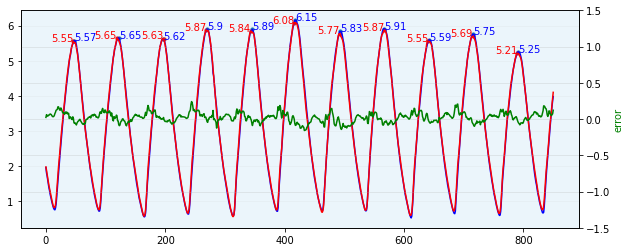

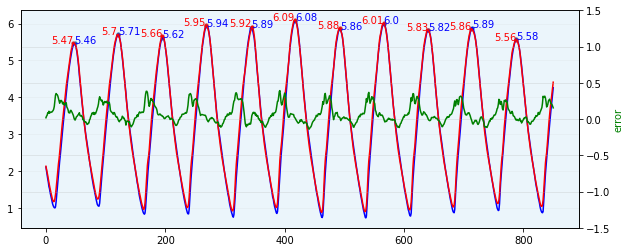

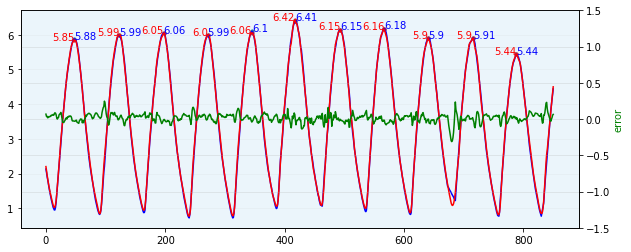

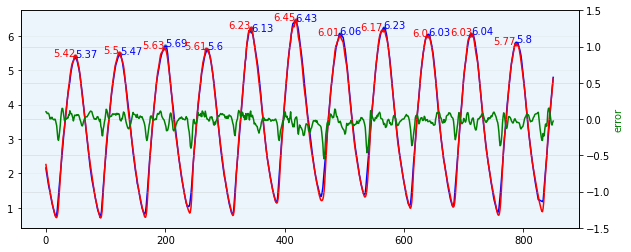

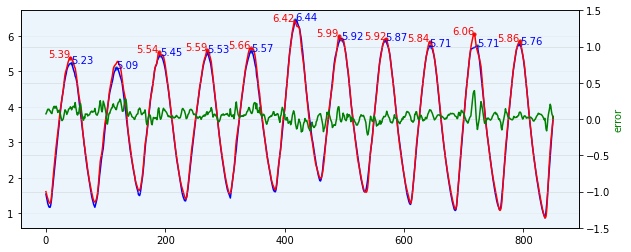

In [ ]:

sc = MinMaxScaler()

testData = [df2019_01,df2019_09,df2019_11,df2019_12_13,df2019_12_22]
for i in testData:
  test_data = sc.fit_transform(i)
  x_test, y_test = split_sequences(test_data, seq_length, n_steps_out)

  yhat = reconstructed_model.predict(x_test, verbose=0)
  X_test_ = np.squeeze(x_test[:,-1,:])
  yhat_ = np.squeeze(yhat[:,-1])
  df_pred = pd.concat([pd.DataFrame(yhat_), pd.DataFrame(X_test_[:,1:][72:])], axis = 1)
  rev_trans = sc.inverse_transform(df_pred)
  pred = i[yhat.shape[0]*-1:]
  pred['prediction']=rev_trans[:,0]

  pred=pred.reset_index(drop=True)


  pred1 = pred.round(2)
  indices, properties = find_peaks(pred1['Pauillac'], height =3, distance=70)
  indices1, properties1 = find_peaks(pred1['prediction'], height =3, distance=70)
# Draw Plot
  fig, ax1 = plt.subplots(figsize=(10,4))

  plt.plot(pred1['Pauillac'],color = "blue")
  plt.plot(pred1['prediction'],color = "red")

  plt.scatter(indices, pred1.Pauillac[indices],color='tab:blue', s=10, label='Troughs')
  plt.scatter(indices1, pred1.prediction[indices1],color='tab:red', s=10, label='Troughs')
  plt.rcParams['axes.facecolor'] = "#ebf5fb"

# Annotate
  for t, p in zip(properties['peak_heights'], indices):
	  plt.text(p,t,t, horizontalalignment='left', color='blue')
  for t, p in zip(properties1['peak_heights'], indices1):
	  plt.text(p,t,t, horizontalalignment='right', color='red')
# Decoration
  plt.grid(axis='y', alpha=.1)
#y_secondary
  ax2 = ax1.twinx()
  ax2.plot(pred.index, pred['prediction']-pred['Pauillac'], 'g-')
  plt.yticks(np.arange(-1.5, 2, step=0.5))
  ax2.set_ylabel('error', color = "green")
  plt.grid(axis='y', alpha=.3)

  plt.show()